# Perceptrón

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_classification

from matplotlib.colors import ListedColormap
from utils import plot_decision_boundary

%matplotlib inline

## Datos

In [2]:
size = 100

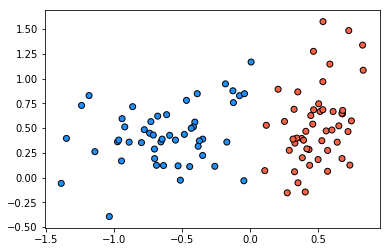

In [3]:
#generamos un conjunto de datos dato por dos clases cada una con un solo cluster

X, y_true = make_classification(n_samples=size, n_features=2, 
                                   n_redundant=0, n_informative=2,
                                   n_clusters_per_class=1, class_sep=0.5,
                                   random_state=1)

y_true[y_true == 0] = -1 

# graficar
cmap_dots = ListedColormap(['tomato', 'dodgerblue'])
plt.scatter(X[:, 0], X[:, 1], c=y_true, cmap=cmap_dots, edgecolors='k')
plt.show()

In [4]:
# tomamos conjntos de entrenamiento y de prueba
X_train, X_test = X[:60], X[-40:]                #datos generados aleatoriamente
y_train, y_test = y_true[:60], y_true[-40:]      #etiquetas de cada dato

In [5]:
X.shape,y_true.shape

((100, 2), (100,))

## Perceptrón: Inicio

In [6]:
w = np.ones(2)  # comenzar a partir de un vector cualquiera
w

array([1., 1.])

Predicción:

In [7]:
y_pred = np.sign(np.dot(X, w))

In [8]:
y_pred

array([-1.,  1.,  1., -1.,  1.,  1.,  1., -1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1., -1.,  1., -1.,  1.,  1., -1.,  1.,  1., -1.,
        1.,  1.,  1.,  1., -1., -1., -1.,  1.,  1., -1.,  1.,  1.,  1.,
        1., -1., -1.,  1.,  1., -1.,  1., -1., -1.,  1., -1., -1.,  1.,
        1.,  1., -1.,  1.,  1.,  1.,  1., -1.,  1.,  1., -1.,  1.,  1.,
       -1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., -1., -1., -1.,  1.,  1.,
       -1., -1.,  1.,  1.,  1., -1., -1., -1.,  1.,  1., -1., -1.,  1.,
       -1.,  1.,  1., -1.,  1., -1., -1.,  1.,  1.])

In [9]:
def predict(w, X):
    return np.sign(np.dot(X, w))

Accuracy:

In [10]:
y_true == y_pred

array([False, False, False, False,  True,  True, False, False, False,
        True, False, False, False, False, False, False,  True, False,
        True, False,  True, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True,  True,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
        True])

In [11]:
(y_true == y_pred).sum() / size

0.14

In [12]:
def accuracy(y_true, y_pred):
    return (y_true == y_pred).sum() / y_true.shape[0]

Plot:

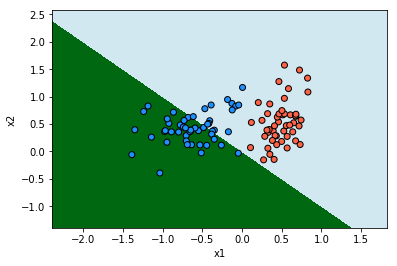

In [13]:
plot_decision_boundary(lambda x: predict(w, x), X, y_true)

## Perceptrón: Un Paso

Buscar uno que no coincida:

In [14]:
y_pred = predict(w, X)

In [15]:
y_true == y_pred

array([False, False, False, False,  True,  True, False, False, False,
        True, False, False, False, False, False, False,  True, False,
        True, False,  True, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True,  True,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
        True])

In [16]:
np.where((y_true == y_pred) == False)

(array([ 0,  1,  2,  3,  6,  7,  8, 10, 11, 12, 13, 14, 15, 17, 19, 21, 22,
        23, 24, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40,
        41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 54, 55, 56, 57, 59, 60,
        61, 62, 63, 64, 65, 66, 67, 68, 70, 71, 72, 73, 74, 75, 76, 78, 79,
        80, 81, 82, 83, 84, 85, 86, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97,
        98]),)

Tomar algún punto:

In [17]:
i = 0
xi, yi = X[i], y_true[i]

In [18]:
yi_pred = predict(w, xi)

In [19]:
yi, yi_pred

(1, -1.0)

Veámoslo:

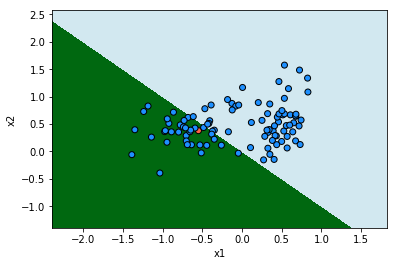

In [20]:
y2 = np.ones(size)
y2[i] = -1
plot_decision_boundary(lambda x: predict(w, x), X, y2)

Maru: lo que vemos es que el punto que predijo (rojo), yace sobre el sector incorrecto

Actualizar modelo:

In [21]:
new_w = w + xi * yi

In [22]:
predict(new_w, xi)

1.0

In [23]:
y_pred = predict(new_w, X)

In [24]:
accuracy(y_true, y_pred)

0.4

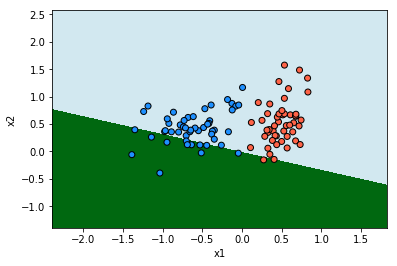

In [25]:
plot_decision_boundary(lambda x: predict(new_w, x), X, y_true)

## Perceptrón: Algoritmo completo

In [26]:
w = np.ones(2)

step = 0
finished = False
while not finished:
    # 1. predecir usando el modelo actual
    y_pred = predict(w, X_train)
    
    # 2. comparar con etiquetas verdaderas
    hits = y_train == y_pred
    print(hits) #maru
    print('step: {}, accuracy: {}'.format(step, accuracy(y_train, y_pred)))
    if hits.all(): #devuelve true cuando todos sus elementos son true
        print('F*******',w)#maru
        finished = True
    else:
        # 3. corregir para una etiqueta incorrecta
        indices = np.where((y_train == y_pred) == False)
        i = indices[0][0]
        xi, yi = X_train[i], y_train[i]
        w = w + xi * yi
        print('-----------',w)#maru
        
        step = step + 1

[False False False False  True  True False False False  True False False
 False False False False  True False  True False  True False False False
 False False False False False  True False False False False False False
 False False False False False False False False False False False False
 False False False False  True  True False False False False  True False]
step: 0, accuracy: 0.16666666666666666
----------- [0.45051362 1.3786438 ]
[ True False False  True  True  True False  True  True  True False False
 False  True False False  True  True  True  True  True False  True False
 False False False False False  True False  True  True False False False
 False False False False  True  True False False False False  True  True
 False  True  True False  True  True  True False False False  True  True]
step: 1, accuracy: 0.4666666666666667
----------- [0.07241451 0.98313329]
[ True False False  True  True  True False  True  True  True False False
 False  True False False  True  True  True  Tr

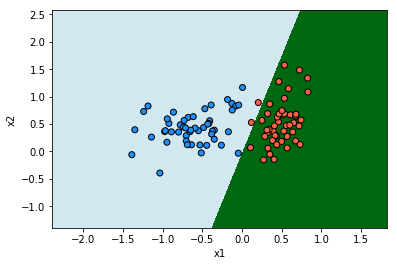

In [27]:
plot_decision_boundary(lambda x: predict(w, x), X, y_true)

In [28]:
y_test_pred = predict(w, X_test)

In [29]:
accuracy(y_test, y_test_pred)

0.95

## Referencias

- [Perceptron (Wikipedia)](https://en.wikipedia.org/wiki/Perceptron)
- [Perceptron Learning Algorithm: A Graphical Explanation Of Why It Works](https://towardsdatascience.com/perceptron-learning-algorithm-d5db0deab975)
- [Perceptron (scikit-learn)](https://scikit-learn.org/stable/modules/linear_model.html#perceptron)